In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
import sympy
import nmp_util

## Generateing fake example data

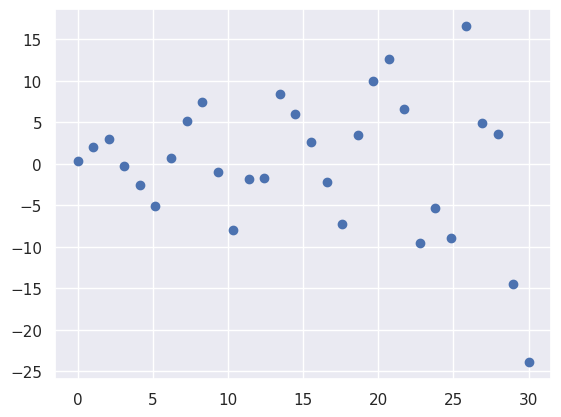

In [ ]:
fake_data_x = np.linspace(0, 30, 30)
fake_std = np.linspace(0.5, 5.5, 30)
fake_data_y = np.sin(fake_data_x)*(2.34+fake_data_x*0.298457) + np.random.normal(0, fake_std, fake_data_x.shape)

plt.plot(fake_data_x, fake_data_y, 'o', label='Fake Data')

np.savetxt('data/fake_data.csv', np.column_stack((fake_data_x, fake_data_y, fake_std)), delimiter=',', header='x,y, std', comments='')

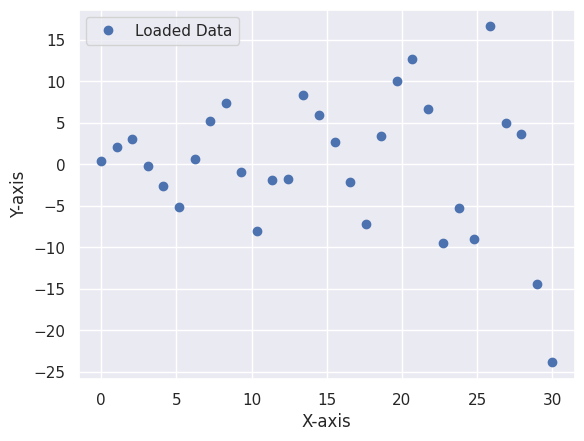

In [3]:
data = np.loadtxt('data/fake_data.csv', delimiter=',', skiprows=1)

x_vals = data[:, 0]
y_vals = data[:, 1]
y_std = data[:, 2]

plt.plot(x_vals, y_vals, 'o', label='Loaded Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

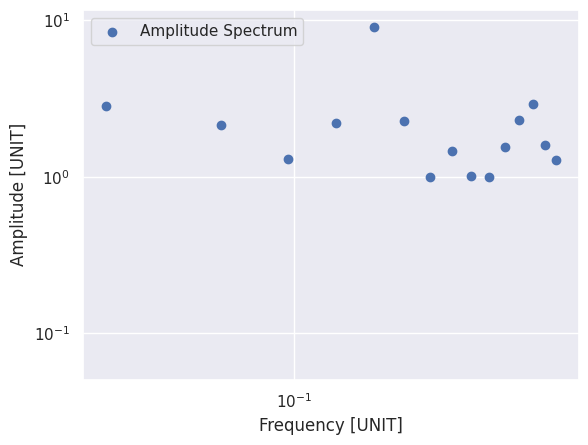

Max frequency: 0.161 [UNIT]


In [4]:
freq, amp = nmp_util.amplitude_spectrum_via_numpy(y_vals, d = x_vals[1] - x_vals[0])
plt.scatter(freq, amp, label='Amplitude Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [UNIT]')
plt.ylabel('Amplitude [UNIT]')
plt.legend()
plt.show()


max_freq = freq[np.argmax(amp)]
print(f'Max frequency: {max_freq:.3f} [UNIT]')


In [5]:
a_0, a_1, x = sympy.symbols('a_0 a_1 x')
functional_model_expr = sympy.sin(x) * (a_0 + a_1 * x)

f = nmp_util.SympyFunctionalModel(functional_model_expr, [a_0, a_1], x)

sigma_0 = 1.0
weights_matrix = np.diag(1.0 / (sigma_0 * y_std)**2)

f.parameters = np.array([2, 0.3])  # Initial guess for parameters a_0 and a_1
f.fit(x_vals, y_vals, weights_matrix)


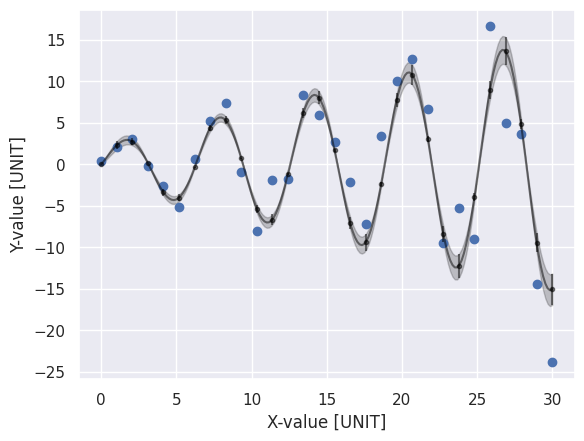

In [6]:
plt.figure()
plt.plot(x_vals, y_vals, 'o', label='Data')
f.plot_prediction()
f.plot_prediction_smooth()
plt.xlabel('X-value [UNIT]')
plt.ylabel('Y-value [UNIT]')
plt.show()

In [7]:
chi2_thresh = f.chi2_threshold(0.05)
chi2_stat = f.m_0**2 / sigma_0**2

print(f'statistic : {chi2_stat:.3f}, threshold : {chi2_thresh:.3f}')
print('The model passes the test' if chi2_stat<chi2_thresh else 'the model failes the test')

statistic : 1.094, threshold : 1.476
The model passes the test


a_0 = 2.239 ± 0.618
a_1 = 0.433 ± 0.076
scale at x = 4: 3.972 +- 0.478


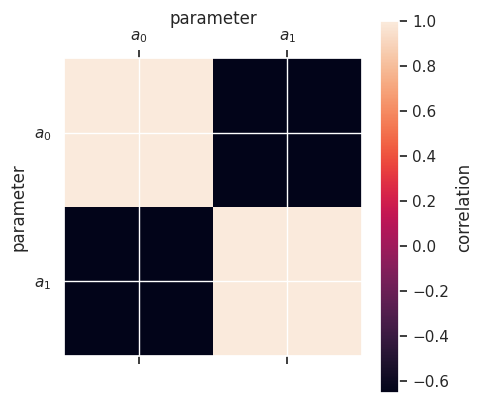

In [8]:
f.print_parameters()
f.show_correlation()

# what is the scale at x = 4 ?

scale_expr = 4 * a_1 + a_0
scale_val, scale_cov = nmp_util.propagate_error(scale_expr, f.parameter_symbols, f.parameters, f.m_0**2 * f.parameter_cof())

print(f'scale at x = 4: {scale_val:.3f} +- {scale_cov[0,0]**0.5:.3f}')